# Course Name
#### <a href='https://www.cdc.gov/nchs/data/nsfg/2013-2015_NSFG_FemPregFile_Codebook-508.pdf'>Handbook can be found here</a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

## Part I:
This part includes the following topics:
- Data Exploration
- Cleaning and Validating
- Filtering and Visualizing 

In [2]:
# read the file
nsfg = pd.read_hdf('datasets/nsfg.hdf5')
nsfg.head(3)

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843


### Check against the handbook
An important step in the "getting-to-know" of the dataset is checking each value. If we bluntly use statistical analysis
without knowing the representation of each value, it will lead to enormous mistakes and, as a result, incorrect interpretation.
For example, if we look at the distribution of weight of the babies, we see something funny.

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64


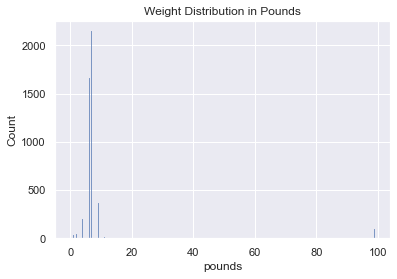

In [12]:
# get the baby weights
pounds = nsfg['birthwgt_lb1']
print(pounds.value_counts().sort_index())

plt.title('Weight Distribution in Pounds')
sns.histplot(x=pounds).set(xlabel='pounds')
plt.show()

As we saw above, it is impossible to have a baby that's 0 to 44 kg. Therefore, if we look at the handbook, we see: <br>
<img src="data_science_track/images/baby_weight.png" width="300" height="300"/>.
In this case, we need to clean the dataset to match the description.

In [13]:
# replace the values to
pounds.replace([98, 99], np.nan, inplace=True)

ounces = nsfg['birthwgt_oz1']
ounces.replace([98, 99], np.nan, inplace=True)

In [14]:
birth_weight = pounds + ounces / 16.0
birth_weight.describe()


count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

In [15]:
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


In [16]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


### What's the average weight of

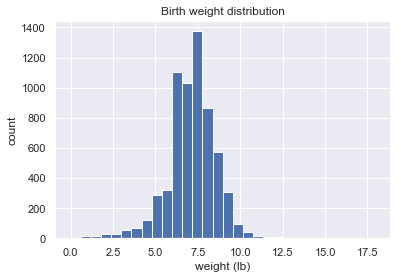

In [18]:
plt.title('Birth weight distribution')
plt.hist(birth_weight.dropna(), bins=30)
plt.xlabel('weight (lb)')
plt.ylabel('count')
plt.show()


In [28]:
preterm = nsfg['prglngth'] < 37
print(f'Number of pre-term born babies: {preterm.sum()}, ratio: {round(preterm.sum() / len(preterm), 2)}%')
print(f'Pre-term baby\'s weight: {round(birth_weight[preterm].mean(), 2)}lb, '
      f'full-term: {round(birth_weight[~preterm].mean(), 2)}lb')

Number of pre-term born babies: 3742, ratio: 0.4%
Pre-term baby's weight: 5.58lb, full-term: 7.37lb


### resample
NSFG is not representative, some groups are oversampled.

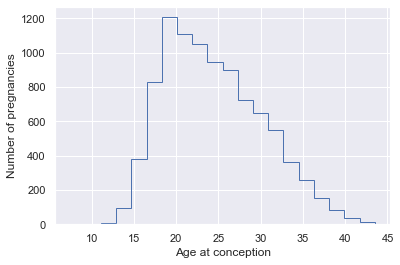

In [29]:
# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()


In [34]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[full_term & single]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[full_term & ~single]
print('Multiple full-term mean:', mult_full_term_weight.mean())

## Part II: Distribution
This section includes the following topics:
- Probability Mass Function
- Cumulative Distribution Functions
- Modeling Distributions

In [35]:
gss = pd.read_hdf('datasets/gss.hdf5')
gss.head(3)

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339


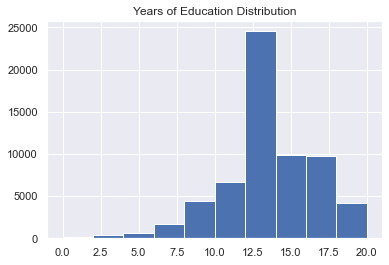

In [38]:
education = gss['educ']
# plot histogram 
plt.title('Years of Education Distribution')
plt.hist(education.dropna())
plt.show()

In [40]:
# define a function to return the % of specific group of people
def pmf(dataset, normalize=False):
    print(dataset.value_counts())
    
pmf(education)

12.0    19145
16.0     7953
14.0     6980
13.0     5405
11.0     3864
15.0     2836
10.0     2819
8.0      2421
18.0     2109
9.0      1963
17.0     1791
20.0     1294
7.0       860
6.0       842
19.0      774
5.0       379
4.0       290
3.0       246
2.0       151
0.0       144
1.0        38
Name: educ, dtype: int64
